# Report - IDXP Challenge - Data Scientist

## Data analysis

Initially, the blueprint of store was analysed to check if any areas is covered for more than one camera, what could generate replicates. 
The cameras was numbered from left-up to right-down in the image.

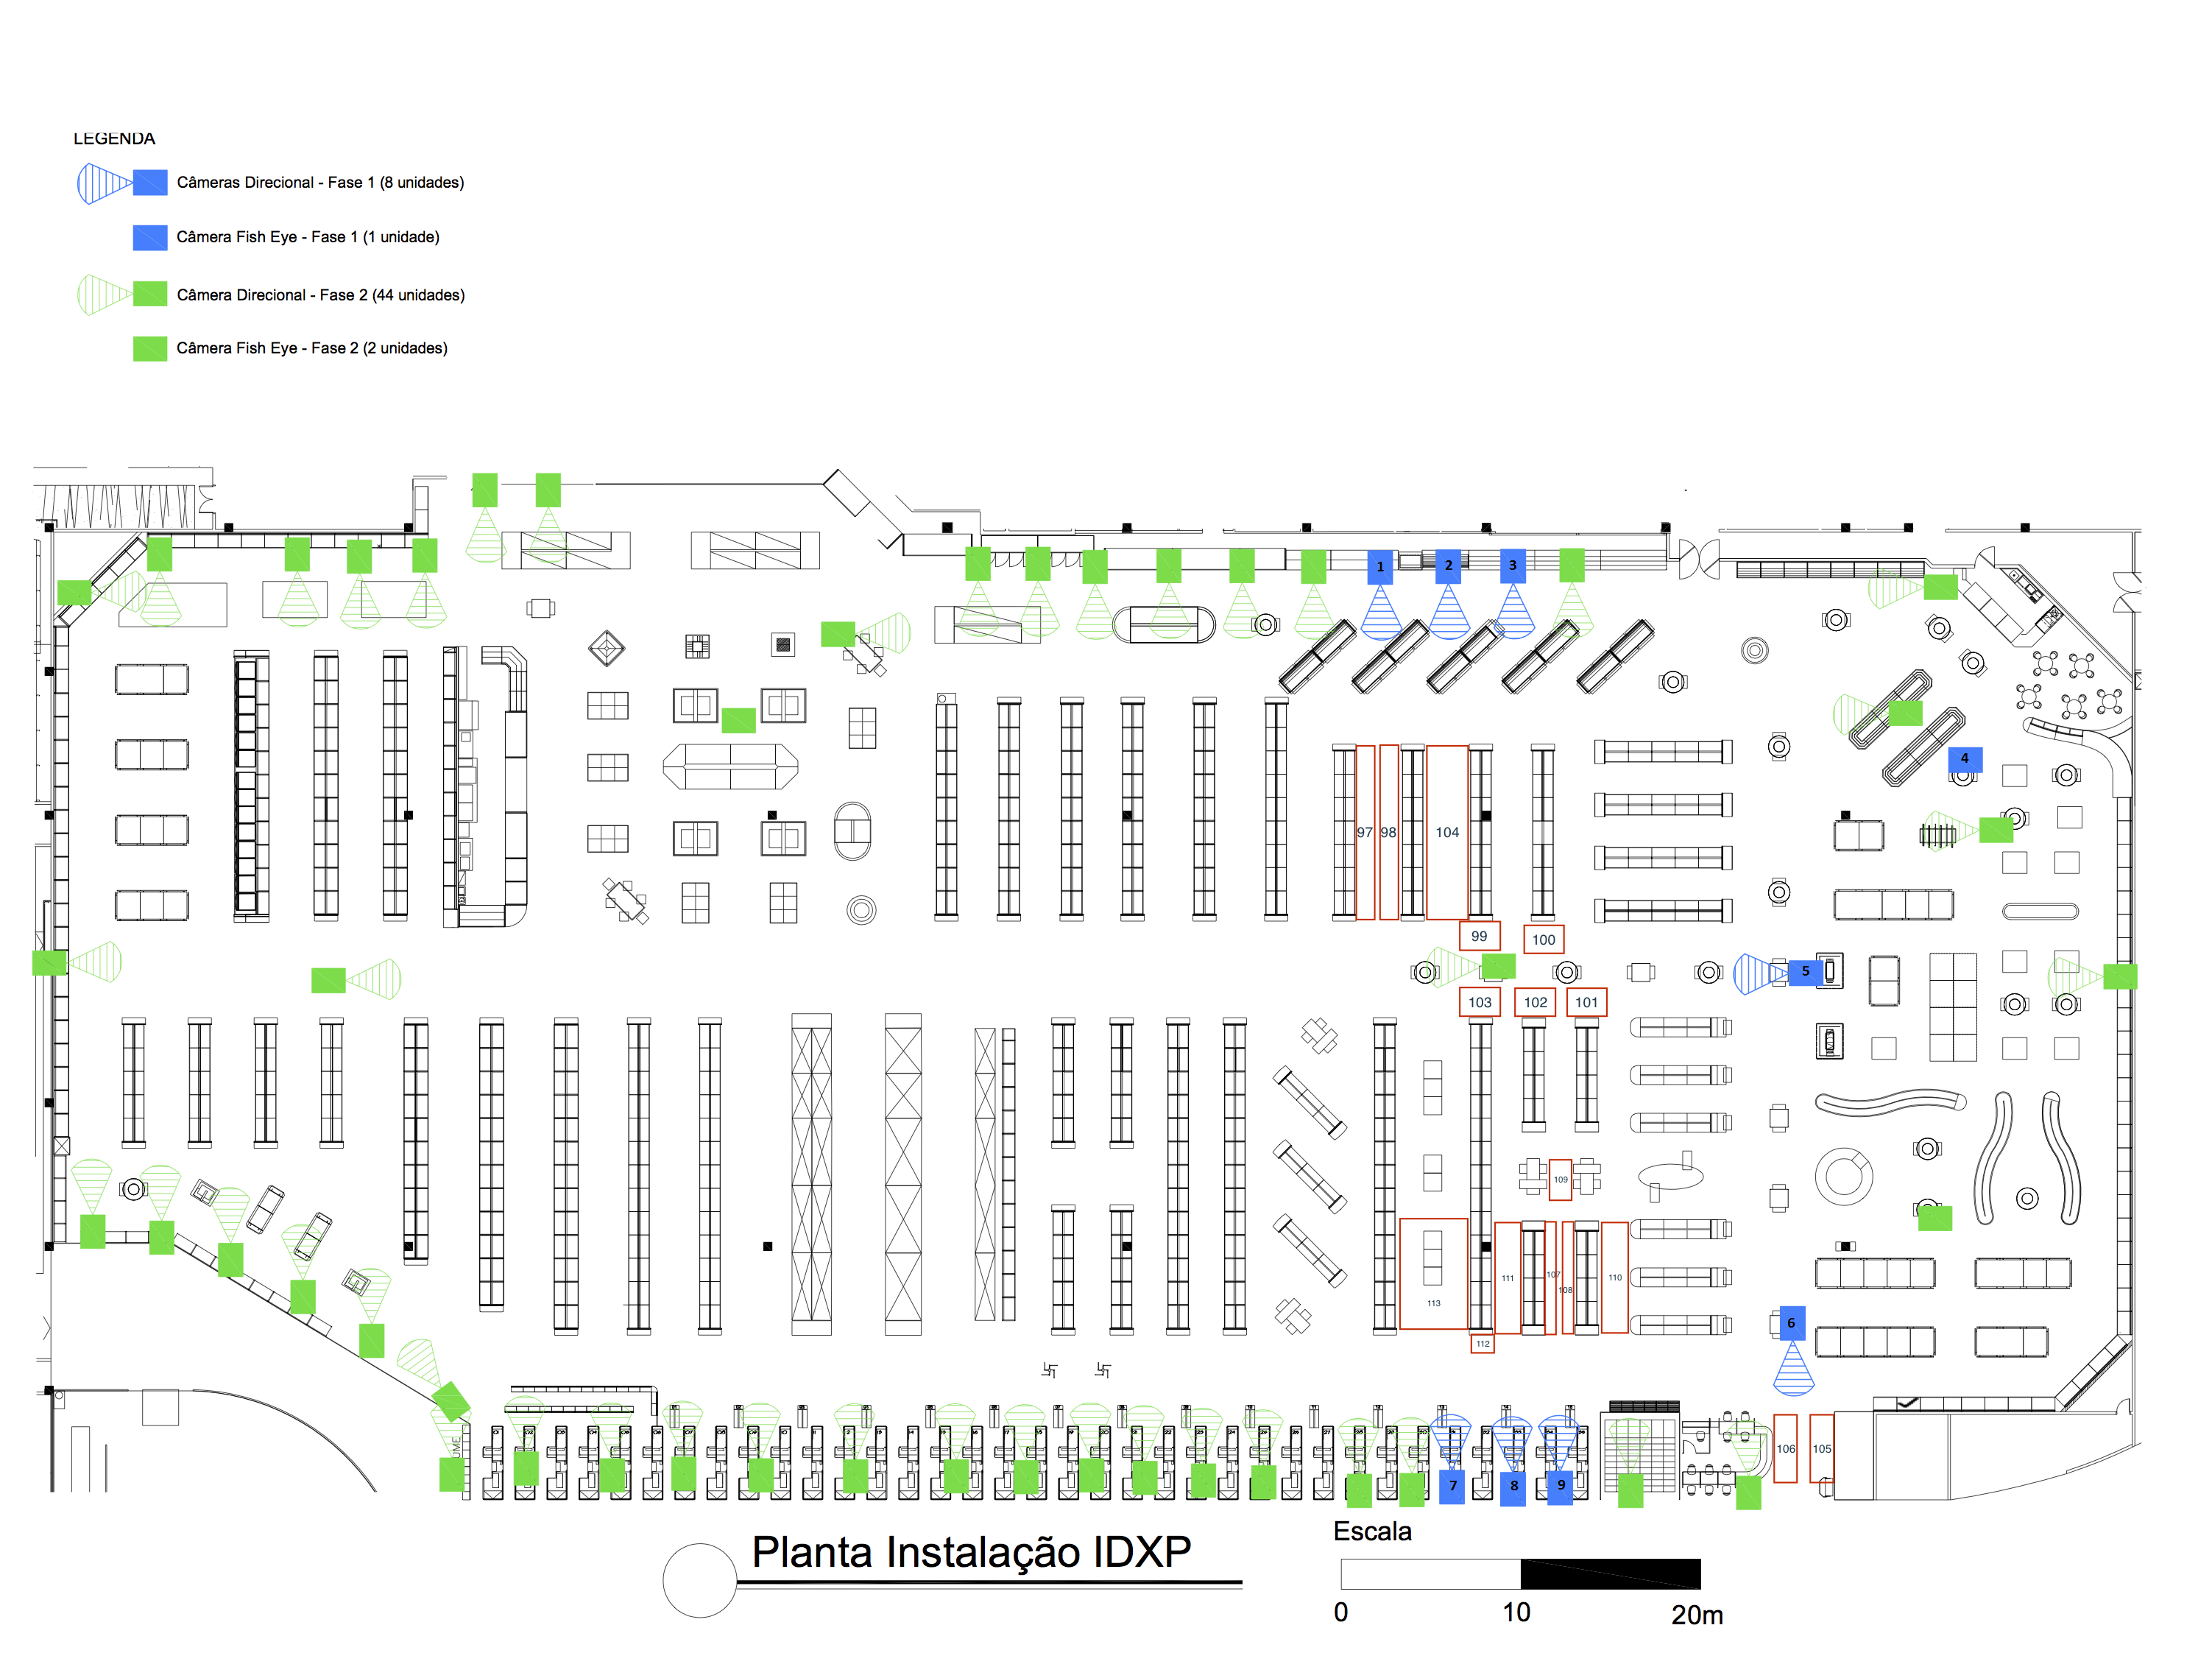

In [1]:
library("IRdisplay")
setwd("~/ds-challenge-master/data")
display_png(file="store.png")

Despite what was thought, the area 112 is covered for only one camera. So, each camera is covered by only one camera and the area 110 isn't covered by none camera, which can be confirmed by the location data. The relationship between areas and cameras is showed in the table below.

In [2]:
read.csv('cameras.csv', sep=',', quote='\'', dec = ".", header=T, stringsAsFactors=F)

,AREA,CAMERA
1,97,1
2,98,1
3,99,5
4,100,5
5,101,5
6,102,5
7,103,5
8,104,2
9,105,6
10,106,6


How we can assume the location data is correct, so the events with 0-second duration was considered like one exposition, because the duration is rounded. Data replicates was considered the camera registered more than one person at the same time, that probably should be together in the area.

So, none filtering in the location data was necessary.

## Libraries 

The libraries used was "dplyr" and "jsonlite". The first was used for the functions "group_by", "summarize" and "arrange" and the last one was used for read JSON files. 

In [12]:
# Load libraries
library("dplyr")      # used for functions "group_by", "summarize" and "arrange"
library("jsonlite")   # used for read json files

## Extra Metrics generated

Were generated 2 extra metrics for areas and 9 for items and categories.

### Area

* `EXPOSITION_DAAD` : What is the exposition for occurrences with duration above the average duration? Meaning, how many people stayed on the area of that item(category) longer than average duration of all areas?
* `SALES_POTENTIAL`: What is the sales potential of area? Meaning, how much money can be generated when one unit each item of area is purchased.


### Item and Category

* `EXPOSITION_DAAD` : What is the exposition for occurrences with duration above the average duration? Meaning, how many people stayed on the area of that item(category) longer than average duration of all areas?
* `CONVERSION_MONEY`: On average, how many people need to be exposed to an item so $1 of purchase will be made?
* `MAX_LIFT`: What is the maximum lift(interest)? Meaning, which is the greater value when the interest measure lift is calculated by association rules for items(categories).
* `MAX_AFFINITY`: What is the item(category) with greater affinity? Meaning, which item(category) probably is purchased together.
* `ATBE`: What is the average time between expositions of an(a) item(category)? 
* `ATBS`: What is the average time between sales of an(a) item(category)?
* `AVG_CONVERSION_TIME`: What is the average coversion time? Meaning, on average, how much time is spent for an exposition to be converted into a sale.
* `RFM`: What is the RFM score of an(a) item(category)? Meaning, what is lifetime value of an(a) item(category), considering its Recency, Frequency and Monetary Value.
* `DEM`: What is the DEM score of an(a) item(category)? Meaning, what is lifetime value of an(a) item(category), considering its Duration, Exposition and Monetary Value.  

## Metrics: how are they calculated and why are they useful?

### EXPOSITION

#### How is it calculated?

For each area, we get the sum of ocurrences of this area in location data. 

For each item, we get its areas, using the shelfs data and get the sum of ocurrences of these areas in location data. 

For each category, we get its skus, using the item data; we get the areas for each sku, using the shelfs data; so, get the sum of ocurrences of these areas in location data. 


### ENGAGEMENT

#### How is it calculated?

For each area, we get the mean of duration for this area.

For each item, we get its areas, using the shelfs data; we get the sum of duration of these areas in location data; so, we dividing this value by exposition.

For each category, we get its skus, using the item data; we get the areas for each sku, using the shelfs data; we get the sum of duration of these areas in location data; so, we dividing this value by exposition. 


### CONVERSION

#### How is it calculated?

For each item, we dividing its exposition by its count (amount of sales), using the item data.

For each category, we dividing its exposition by its count (amount of sales), using the category data.

### EXPOSITION_DAAD

#### How is it calculated?

First, we filter the location data by duration above the average duration.

This metric is calculated the same way as the exposition, difering only that are used filtered location data.

#### Why is it useful?

Because the exposition metric considers 0-seconds duration and n-seconds duration also can be not interesting, once can be insufficient time to an exposition convert into sale. So, this metric considers only how many people that stayed on the area of that item(category) longer than average duration of all areas. 


### SALES_POTENTIAL

#### How is it calculated?

First, we get the skus for each area, using the shelfs data. After, for each sku, we get its value, using the item data, dividing VALUE_SUM by COUNT. So, the SALES_POTENTIAL is the sum of values of all items belonging area.  

#### Why is it useful?

Because it provides a measure of sales potential for each area and it can be used to optimize the placement of items in the areas.


### CONVERSION_MONEY

#### How is it calculated?

For each item, we dividing its exposition by its value_sum, using the item data.

For each category, we dividing its exposition by its value_sum, using the category data.

#### Why is it useful?
Because this metric provides the conversion in money instead of amount of sales, what can be more interesting.


### MAX_AFFINITY and MAX_LIFT

#### How are they calculated?

First, we calculated the measure of interest lift, obtained from data mining using association rules.

For this, we need get the number of baskets (n) and, for each item or category, we get the unique basket_ids containing item(category) A and unique basket_ids containing item(category) B. So, we get the number of basket_ids containing A (nA), number of basket_ids containing B (nB) and number of basket_ids containing A and B (nAB). 

We calculate the rule confidence (conf = nAB / nA) and the support of B (supB = nB / n). Finally, we have the lift between A and B. These steps are done between each item(category) and all other.

For each item, the MAX_LIFT is the maximum value of item_lift matrix and MAX_AFFINITY is the corresponding item.

For each category, the MAX_LIFT is the maximum value of category_lift matrix and MAX_AFFINITY is the corresponding category.

#### Why are they useful?

Because these metrics are obtained from lift, the most useful metric of market basket analys, widely used for identifying affinities among items(categories) that customers purchase together, which turn can be used to predict ways to increase revenues.

Lift is the ratio of the conditional probability of purchasing B to the simple probability of purchasing B. As such, lift is a measure of how much more likely the customer is to purchase B now that she intends to purchase A, as compared to a customer who is not purchasing A. 

If lift is greater than 1, A and B have an affinity that may lead to additional sales. A high lift value might also induce a store manager to place items(categories) together. 

Clearly, if lift is lower than 1, the effort to sell B to the customer is higher than the effort to sell it to a customer who has not purchased A. This might indicate that items(categories) are substitutes: a customer who intends to purchase A has no need or interest in purchasing B. Alternatively, they could be in different segments. When there is such a choice, the store manager may choose to discontinue the item with lower revenues.

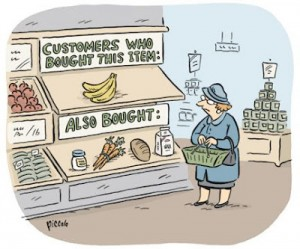

In [4]:
display_png(file="association_rules.png")

### ATBE, ATBS and AVG_CONVERSION_TIME

#### How are they calculated?

For each item or category: 

We get the timestamps for its areas, using location data; we sort the timestamps and remove the minimum value. So, the ATBE (Average Time Between Exposition) is the average value of all differences between actual and previous timestamp.

We get the timestamps for its skus, using sales data; we sort the timestamps and remove the minimum value. So, the ATBS (Average Time Between Sales) is the average value of all differences between actual and previous timestamp.

The AVG_CONVERSION_TIME is the ratio between ATBE and ATBS.

It is important to mention that the units are the same of timestamps.

#### Why are they useful?

Because ATBE and ATBS provide a notion of time between one exposition and other and between one sale and other, and combined they create a very important metric, the average conversion time, meaning, on average, how much time is necessary for a exposition to be converted into sale.


### RFM and DEM

#### How are they calculated?

RFM is a known metric in market segmentation based on Recency, Frequency and Monetary Value. 

Recency: Products what were purchased recently are more likely to be purschased again versus products what had not be purchased in a while. 

Frequency: Products what were purchased frequently are more likely to be purschased again versus products what had just one or two purchases. 

Monetary Value: Products what had higer value purchases are more likely to be purschased again.

DEM is a metric similar to RFM, but considers the duration (total time spent in the areas) as time variable and the exposition (amount of people exposed to areas) as frequency variable.

For each item or category: 

RFM is calculated as the geometric mean between inverse of ATBS, count (amount of sales) and value_sum (total value purschased).

DEM is calculated as the geometric mean between duration_sum, exposition and value_sum (total value purschased).

It is important to mention that as RFM and DEM are scores, so they are dimensionless.

#### Why are they useful?

BRFM and DEM is closely related to LifeTime Value (LTV). LTV is the expected net profit an item or category will contribute to your business over the LifeCycle. Because of the linkage to LTV and the LifeCycle, RFM and DEM can be used as a proxy for the future profitability of a business.

The higer is the RFM and DEM, the more profitable the item or category is to the business now and in the future. High RFM and DEM are most likely to continue to be purchased. The opposite is true for low RFM and DEM score; they are the least likely to be purchased.

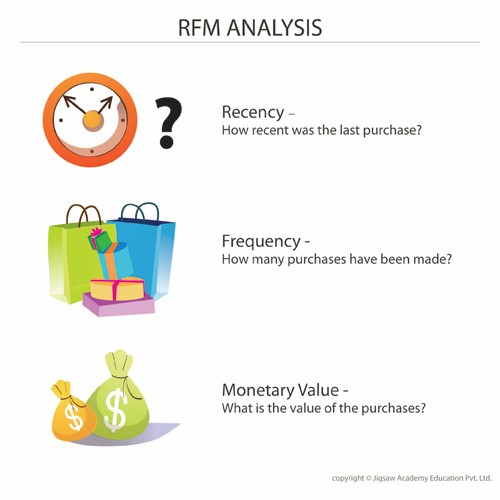

In [5]:
display_png(file="RFM.png")

## Code

In [6]:
# INITIALIZATION ----------------------------------------------------------

# Clean variables
rm(list=ls())

# READING FILES -----------------------------------------------------------

# Read files
location = read.csv('location.csv', sep=',', quote='\'', dec = ".", header=T, stringsAsFactors=F)
colnames(location) = cbind("AREA","TIMESTAMP","DURATION") 

sales = read.csv('sales.csv', sep=',', quote='\'', dec = ".", header=T, stringsAsFactors=F)
colnames(sales) = cbind("BASKET_ID","TIMESTAMP","CATEGORY","PRODUCT_NAME","SKU","VALUE")

shelfs = t(as.data.frame(fromJSON(txt="shelfs.json"),optional=T))
shelfs_area = cbind(rownames(shelfs),rownames(shelfs))

# DURATION ABOVE AVERAGE DURATION
daad = location[which(location[,3] > mean(location[,3])),]

# ITEM --------------------------------------------------------------------

# Group ITEMS
item = sales %>%
group_by(SKU,PRODUCT_NAME,CATEGORY) %>%
summarise(COUNT = n(),VALUE_SUM = sum(VALUE)) %>%
arrange(SKU,PRODUCT_NAME,CATEGORY)

# LIFT ITEM
item_lift = matrix(NA,nrow(item),nrow(item))
rownames(item_lift) = as.matrix(item[,2])
colnames(item_lift) = t(as.matrix(item[,2]))

# Get number of baskets
n = length(unique(sales[,1]))

# Calculate metrics
item[,"EXPOSITION"] = rep(0,nrow(item))
item[,"ENGAGEMENT"] = rep(0,nrow(item))
item[,"CONVERSION"] = rep(0,nrow(item))
item[,"CONVERSION_MONEY"] = rep(0,nrow(item))
item[,"RFM"] = rep(0,nrow(item))
item[,"EXPOSITION_DAAD"] = rep(0,nrow(item))
item[,"MAX_AFFINITY"] = rep("",nrow(item))
item[,"MAX_LIFT"] = rep(0,nrow(item))
item[,"ATBE"] = rep(NA,nrow(item))
item[,"ATBS"] = rep(0,nrow(item))
item[,"AVG_CONVERSION_TIME"] = rep(0,nrow(item))
item[,"DEM"] = rep(0,nrow(item))

for(i in 1:nrow(item)){
  
  # Get item areas
  areas = as.numeric(unique(shelfs_area[which(shelfs==as.numeric(item[i,1]))]))
  
  for(j in 1:length(areas)){
    
    # EXPOSITION
    item[i,6] = item[i,6] + length(which(location[,1]==areas[j]))
    
    # EXPOSITION_DAAD
    # EXPOSITION FOR DURATION ABOVE AVERAGE DURATION
    item[i,11] = item[i,11] + length(which(daad[,1]==areas[j]))
    
    # ENGAGEMENT
    item[i,7] = item[i,7] + sum(location[which(location[,1]==areas[j]),3])
    
    # Get exposition timestamps 
    if(j == 1){
      timestamp_e = as.matrix(location[which(location[,1]==areas[j]),2])
    }
    else{
      timestamp_e = rbind(timestamp_e,as.matrix(location[which(location[,1]==areas[j]),2]))
    }
  }
  
  # ENGAGEMENT
  # ENGAGEMENT = DURATION_SUM / EXPOSITION
  item[i,7] = item[i,7]/item[i,6]
  if(is.na(item[i,7])){
    item[i,7] = 0
  }
  
  # Get sales timestamps
  timestamp_s = as.matrix(sales[which(sales[,5]==as.numeric(item[i,1])),2])
  
  # Sort timestamps
  timestamp_e = sort(timestamp_e)
  timestamp_s = sort(timestamp_s)
  # Remove min value
  timestamp_e = timestamp_e-timestamp_e[1]
  timestamp_s = timestamp_s-timestamp_s[1]
  
  # ATBE
  if(item[i,6] > 0){
    item[i,14] = mean(timestamp_e[2:length(timestamp_e)]-timestamp_e[1:length(timestamp_e)-1])
  }
  
  # ATBS
  item[i,15] = mean(timestamp_s[2:length(timestamp_s)]-timestamp_s[1:length(timestamp_s)-1])
  
  # AVG_CONVERSION_TIME
  item[i,16] = item[i,14] / item[i,15]
  
  # CONVERSION
  item[i,8] = item[i,6]/item[i,4]
  
  # CONVERSION_MONEY
  item[i,9] = item[i,6]/item[i,5]
  
  # RFM
  # RFM = GMEAN(1/ATBS,COUNT,VALUE_SUM)
  item[i,10] = ((1/item[i,15]) * item[i,4] * item[i,5])^(1/3)
  
  # BASKET_IDs containing A
  basketA = as.matrix(unique(sales[which(sales[,5]==as.numeric(item[i,1])),1]))
  # Number of baskets containing A
  nA = length(basketA)
  for(k in 1:nrow(item)){
    if(i != k){
      # BASKET_IDs containing B
      basketB = as.matrix(unique(sales[which(sales[,5]==as.numeric(item[k,1])),1]))
      # Number of baskets containing B
      nB = length(basketB)
      # Number of purchases containing A and B
      eq = match(basketA,basketB)
      nAB = sum(length(which(!is.na(eq))))
      # Rule confidence
      conf = nAB / nA
      # Support of B
      supB = nB / n
      # LIFT (interest)
      item_lift[i,k] = conf / supB
    }
  }
  
  # MAX_AFFINITY
  ind = as.numeric(which.max(item_lift[i,]))
  if(ind )
  item[i,12] = as.character(item[ind,2])
  
  # MAX_LIFT
  item[i,13] = as.numeric(item_lift[i,ind])
  
  # DEM
  # DEM = GMEAN(DURATION_SUM,EXPOSITION,VALUE_SUM)
  item[i,17] = ((item[i,7]*item[i,6]) * item[i,6] * item[i,5])^(1/3)
  
  # Clean variables
  rm(areas)
  rm(timestamp_e)
  rm(timestamp_s)
}

# CATEGORY ----------------------------------------------------------------

# Group CATEGORY
category = item %>%
group_by(CATEGORY) %>%
summarise(COUNT = sum(COUNT),VALUE_SUM = sum(VALUE_SUM)) %>%
arrange(CATEGORY)

# Calculate metrics
category[,"EXPOSITION"] = rep(0,nrow(category))
category[,"ENGAGEMENT"] = rep(0,nrow(category))
category[,"CONVERSION"] = rep(0,nrow(category))
# New metrics
category[,"CONVERSION_MONEY"] = rep(0,nrow(category))
category[,"RFM"] = rep(0,nrow(category))
category[,"EXPOSITION_DAAD"] = rep(0,nrow(category))
category[,"MAX_AFFINITY"] = rep("",nrow(category))
category[,"MAX_LIFT"] = rep(0,nrow(category))
category[,"ATBE"] = rep(NA,nrow(category))
category[,"ATBS"] = rep(0,nrow(category))
category[,"AVG_CONVERSION_TIME"] = rep(0,nrow(category))
category[,"DEM"] = rep(0,nrow(category))

# LIFT CATEGORY
category_lift = matrix(NA,nrow(category),nrow(category))
rownames(category_lift) = as.matrix(category[,1])
colnames(category_lift) = t(as.matrix(category[,1]))

for(i in 1:nrow(category)){
  
  # Get category skus
  skus = item[which(item[,3]==as.character(category[i,1])),1]
  
  # Get category areas
  for(k in 1:length(skus)){
    if(k==1){
      areas = as.numeric(shelfs_area[which(shelfs==as.numeric(skus[k,1]))])
    }
    else{
      areas = rbind(areas,as.numeric(shelfs_area[which(shelfs==as.numeric(skus[k,1]))]))
    }
  }
  areas = unique(areas)
  
  for(j in 1:length(areas)){

    # EXPOSITION
    category[i,4] = category[i,4] + length(which(location[,1]==areas[j]))
    
    # EXPOSITION_DAAD
    # EXPOSITION FOR DURATION ABOVE AVERAGE DURATION
    category[i,9] = category[i,9] + length(which(daad[,1]==areas[j]))

    # ENGAGEMENT
    category[i,5] = category[i,5] + sum(location[which(location[,1]==areas[j]),3])
    
    # Get expostion and sales timestamps 
    if(j == 1){
      timestamp_e = as.matrix(location[which(location[,1]==areas[j]),2])
      timestamp_s = as.matrix(sales[which(sales[,3]==as.character(category[i,1])),2])
    }
    else{
      timestamp_e = rbind(timestamp_e,as.matrix(location[which(location[,1]==areas[j]),2]))
      timestamp_s = rbind(timestamp_s,as.matrix(sales[which(sales[,3]==as.character(category[i,1])),2]))
    }
  }
  
  # Order timestamp
  timestamp_e = sort(timestamp_e)
  timestamp_s = sort(timestamp_s)
  # Remove min value
  timestamp_e = timestamp_e-timestamp_e[1]
  timestamp_s = timestamp_s-timestamp_s[1]
  
  # ATBE
  if(category[i,4] > 0){
    category[i,12] = mean(timestamp_e[2:length(timestamp_e)]-timestamp_e[1:length(timestamp_e)-1])
  }
  
  # ATBS
  category[i,13] = mean(timestamp_s[2:length(timestamp_s)]-timestamp_s[1:length(timestamp_s)-1])
  
  # AVG_CONVERSION_TIME
  category[i,14] = category[i,12] / category[i,13]

  # ENGAGEMENT
  # ENGAGEMENT = DURATION_SUM / EXPOSITION
  category[i,5] = category[i,5]/category[i,4]
  if(is.na(category[i,5])){
    category[i,5] = 0
  }

  # CONVERSION
  category[i,6] = category[i,4]/category[i,2]

  # CONVERSION_MONEY
  category[i,7] = category[i,4]/category[i,3]
  
  # RFM
  # RFM = GMEAN(1/ATBS,COUNT,VALUE_SUM)
  category[i,8] = ((1/category[i,13]) * category[i,2] * category[i,3])^(1/3)
  
  # BASKET_IDs containing A
  basketA = as.matrix(unique(sales[which(sales[,3]==as.character(category[i,1])),1]))
  # Number of baskets containing A
  nA = length(basketA)
  for(k in 1:nrow(category)){
    if(i != k){
      # BASKET_IDs containing B
      basketB = as.matrix(unique(sales[which(sales[,3]==as.character(category[k,1])),1]))
      # Number of baskets containing B
      nB = length(basketB)
      # Number of purchases containing A and B
      eq = match(basketA,basketB)
      nAB = sum(length(which(!is.na(eq))))
      # Rule confidence
      conf = nAB / nA
      # Support of B
      supB = nB / n
      # LIFT (interest)
      category_lift[i,k] = conf / supB
    }
  }
  
  # MAX_AFFINITY
  ind = as.numeric(which.max(category_lift[i,]))
  category[i,10] = as.character(category[ind,1])
  
  # MAX_LIFT
  category[i,11] = as.numeric(category_lift[i,ind])
  
  # DEM
  # DEM = GMEAN(DURATION_SUM,EXPOSITION,VALUE_SUM)
  category[i,15] = ((category[i,5]*category[i,4]) * category[i,4] * category[i,3])^(1/3)

  # Clean variables
  rm(areas)
  rm(skus)
  rm(timestamp_e)
  rm(timestamp_s)
}

# AREA --------------------------------------------------------------------

# Group and calculate METRICS for AREA
area = location %>%
group_by(AREA) %>%
summarise(DURATION_SUM = sum(DURATION),EXPOSITION = n(),ENGAGEMENT = mean(DURATION)) %>%
arrange(AREA)

# New metrics
area[,"EXPOSITION_DAAD"] = rep(0,nrow(area))
area[,"SALES_POTENTIAL"] = rep(0,nrow(area))

# EXPOSITION_DAAD
exposition_daad = daad %>%
group_by(AREA) %>%
summarise(EXPOSITION = n()) %>%
arrange(AREA)
area[,5] = exposition_daad[,2]

for(i in 1:nrow(area)){
  
  # Get area skus
  skus = as.numeric(unique(shelfs[which(shelfs_area==as.numeric(area[i,1]))]))
  
  if(length(skus) > 0){
    for(k in 1:length(skus)){
      
      ind = which(item[,1] == as.numeric(skus[k]))
      
      # SALES_POTENTIAL
      area[i,6] = area[i,5] + item[ind,5]/item[ind,4] 
    }
  }
}

## Results

### Area

In [7]:
cbind(area[,1],area[,3:6])

,AREA,EXPOSITION,ENGAGEMENT,EXPOSITION_DAAD,SALES_POTENTIAL
1,97.000000,4285.000000,3.938856,1205.000000,1274.850000
2,98.000000,361.000000,4.609418,172.000000,271.490000
3,99.000000,1828.000000,3.012582,558.000000,567.990000
4,100.000000,2847.000000,2.689498,792.000000,808.990000
5,101.000000,1602.000000,1.904494,308.000000,321.130000
6,102.000000,2505.000000,3.595609,950.000000,953.790000
7,103.000000,3287.000000,3.756313,1209.000000,1288.900000
8,104.000000,4665.000000,7.169775,2900.000000,2939.900000
9,105.000000,2440.000000,1.022541,182.000000,0.000000
10,106.000000,4536.000000,1.098545,412.000000,0.000000


### Category

In [8]:
cbind(category[,1],category[,4:6],category[,9],category[,7],category[,10:14],category[,8],category[,15])

,CATEGORY,EXPOSITION,ENGAGEMENT,CONVERSION,EXPOSITION_DAAD,CONVERSION_MONEY,MAX_AFFINITY,MAX_LIFT,ATBE,ATBS,AVG_CONVERSION_TIME,RFM,DEM
1,BISCOITO,2645,3.66162570888469,8.5048231511254,1039,2.8916900807924,SHAMPOO,1.13465866466617,29.6240544629349,89.7165861513688,0.330195961903338,14.6910846163488,2861.5394934006
2,CELULAR,0,0,0,0,0,PAPELARIA,1.12325744659513,NA,93.119170984456,NA,113.247896676491,0
3,FERRAMENTAS,361,4.60941828254848,1.24913494809689,172,0.0114050626472825,SUPLEMENTOS,1.10135674381484,129.677777777778,186.743055555556,0.694418206835001,36.5893170187151,2669.04983970566
4,PAPELARIA,4665,7.16977491961415,16.7805755395683,2900,0.751461847001402,CELULAR,1.12325744659513,16.7448542024014,202.389891696751,0.0827356250948089,20.4299308563586,9894.28715060536
5,PET SHOP,433,7.1108545034642,1.51929824561404,278,0.00490342961494828,SHAMPOO,1.16279069767442,120.178240740741,197.401408450704,0.608801333708579,50.3300684690134,4901.11822413066
6,REFRIGERANTE,2078,3.62030798845043,7.47482014388489,713,1.3615337238406,SHAMPOO,1.13425595662719,27.4997592681753,140.944144144144,0.195111045124735,14.4390393456715,2878.84256388175
7,SHAMPOO,2652,3.38046757164404,9.27272727272727,919,0.684892591693482,PET SHOP,1.16279069767442,23.1101471142965,97.5726795096322,0.236850594146234,22.4730982709708,4515.35210029028
8,SUPLEMENTOS,5887,3.38525564803805,21.025,1513,0.461667555444023,SHAMPOO,1.11627906976744,9.64882772680938,139.313059033989,0.0692600377431615,29.4833590459749,11437.0690031646


### Item

In [9]:
cbind(item[,1:3],item[,6:8],item[,11],item[,9],item[,12:16],item[,10],item[,17])

,SKU,PRODUCT_NAME,CATEGORY,EXPOSITION,ENGAGEMENT,CONVERSION,EXPOSITION_DAAD,CONVERSION_MONEY,MAX_AFFINITY,MAX_LIFT,ATBE,ATBS,AVG_CONVERSION_TIME,RFM,DEM
1,1,DOLLY GUARANA,REFRIGERANTE,2078,3.62030798845043,14.9496402877698,713,2.99591989734865,ORLEI,1.40116763969975,27.4997592681753,406.246376811594,0.0676923188435694,6.19127671793746,2213.35283045593
2,2,ORLEI,REFRIGERANTE,1166,5.27358490566038,8.38848920863309,571,1.40041556070669,DOLLY GUARANA,1.40116763969975,48.3347639484979,566.840579710145,0.085270472296133,5.88841616764968,1814.04569287528
3,3,BIM,SHAMPOO,2652,3.38046757164404,18.8085106382979,919,1.88273379762741,BOLACHOX,1.28847530422334,23.1101471142965,397.957142857143,0.0580719495279734,7.93211745586652,3223.3154127736
4,4,RANQUOZOO,SHAMPOO,3671,3.02778534459275,25.3172413793103,1153,1.49012603762863,DOG BIRL,1.28348214285714,17.0994550408719,319.430555555556,0.0535310562608278,10.3796882262365,4649.63017270325
5,7,BISCOITOX,BISCOITO,2645,3.66162570888469,18.1164383561644,1039,4.78006289080854,CADERNO 5000 FOLHAS,1.24059217599868,29.6240544629349,348.041379310345,0.085116472419561,6.1456998625352,2420.13238043105
6,8,BOLACHOX,BISCOITO,140,4.84285714285714,0.848484848484849,89,0.38743600387436,BIM,1.28847530422334,554.820143884892,329.55487804878,1.68354401904125,5.65580923822748,324.909140676035
7,9,ET BILU,PET SHOP,433,7.1108545034642,2.77564102564103,278,0.00555139307914363,DOG BIRL,1.25,120.178240740741,361.690322580645,0.332268333538133,32.2818098751127,4702.48949442791
8,10,DOG BIRL,PET SHOP,3720,4.14677419354839,28.8372093023256,1487,0.360916261606077,RANQUOZOO,1.28348214285714,15.5563323474052,435.265625,0.0357398596487035,14.5096613593889,8394.16662035565
9,11,NEGATIVA 13,SUPLEMENTOS,5887,3.38525564803805,49.0583333333333,1513,3.73635440467124,REPIMBOCA,1.27325266389742,9.64882772680938,636.714285714286,0.0151540933559941,6.671562230678,5696.50529023539
10,12,CONSTROI FIBRA,SUPLEMENTOS,4285,3.93885647607935,26.78125,1205,0.383410880458125,CADERNO 5000 FOLHAS,1.32935868514341,12.4285714285714,350.40251572327,0.0354694126636547,17.2165602500099,9315.06880885356


### Category Lift

In [10]:
as.data.frame(category_lift)

,BISCOITO,CELULAR,FERRAMENTAS,PAPELARIA,PET SHOP,REFRIGERANTE,SHAMPOO,SUPLEMENTOS
BISCOITO,NA,1.057044,1.054244,1.097538,1.065668,1.108253,1.134659,1.096774
CELULAR,1.057044,NA,1.069974,1.123257,1.029056,1.081418,1.034687,1.036320
FERRAMENTAS,1.0542440,1.0699744,NA,1.1007901,0.9676776,1.0898996,1.0621021,1.1013567
PAPELARIA,1.097538,1.123257,1.100790,NA,1.035503,1.110829,1.063025,1.085376
PET SHOP,1.0656682,1.0290557,0.9676776,1.0355030,NA,1.0955302,1.1627907,1.0918367
REFRIGERANTE,1.108253,1.081418,1.089900,1.110829,1.095530,NA,1.134256,1.104294
SHAMPOO,1.134659,1.034687,1.062102,1.063025,1.162791,1.134256,NA,1.116279
SUPLEMENTOS,1.096774,1.036320,1.101357,1.085376,1.091837,1.104294,1.116279,NA


### Item Lift

In [11]:
as.data.frame(item_lift)

,DOLLY GUARANA,ORLEI,BIM,RANQUOZOO,BISCOITOX,BOLACHOX,ET BILU,DOG BIRL,NEGATIVA 13,CONSTROI FIBRA,REPIMBOCA,CHAVE DE COBRA,TINTA INVISIVEL,CADERNO 5000 FOLHAS,HIPHONE 72,SANIA UNIVERSE A
DOLLY GUARANA,NA,1.401168,1.165289,1.144481,1.086082,1.159628,1.159091,1.079545,1.252319,1.222571,1.134352,1.280632,1.220779,1.146984,1.116883,1.057994
ORLEI,1.4011676,NA,1.2010008,1.1058322,1.0960461,1.2569530,1.1009174,1.2327982,1.1233851,1.2100601,1.0716895,0.9573195,1.2581913,1.2346738,1.1533421,1.1388801
BIM,1.165289,1.201001,NA,1.217532,1.013677,1.288475,1.204545,1.278409,1.113173,1.222571,1.086082,1.185771,1.168831,1.045030,1.168831,1.081505
RANQUOZOO,1.1444805,1.1058322,1.2175325,NA,1.1378003,1.1389201,1.2053571,1.2834821,1.2026239,0.9236453,1.1140961,1.1180124,0.9693878,1.1014686,1.0714286,0.9467365
BISCOITOX,1.0860821,1.0960461,1.0136766,1.1378003,NA,1.1288412,1.1061947,1.0508850,1.0836193,1.1901129,1.1042368,1.0850327,1.1125158,1.2405922,1.1883692,0.8925847
BOLACHOX,1.159628,1.256953,1.288475,1.138920,1.128841,NA,1.062992,1.131890,1.156998,1.201466,1.045223,1.068127,1.102362,1.147987,1.192351,1.079283
ET BILU,1.1590909,1.1009174,1.2045455,1.2053571,1.1061947,1.0629921,NA,1.2500000,1.1479592,1.0775862,1.0619469,0.9782609,1.0952381,1.2383178,1.1666667,0.9482759
DOG BIRL,1.0795455,1.2327982,1.2784091,1.2834821,1.0508850,1.1318898,1.2500000,NA,1.1479592,1.0506466,0.8849558,1.0054348,0.9226190,1.2266355,1.0119048,0.9967672
NEGATIVA 13,1.2523191,1.1233851,1.1131725,1.2026239,1.0836193,1.1569982,1.1479592,1.1479592,NA,1.0292048,1.2732527,1.2244898,1.1078717,0.9727255,1.1953353,1.0555947
CONSTROI FIBRA,1.2225705,1.2100601,1.2225705,0.9236453,1.1901129,1.2014662,1.0775862,1.0506466,1.0292048,NA,1.0299054,1.1469265,1.0837438,1.3293587,1.1083744,1.0701546


## Conclusion

It is worth mentioning that there is a uncertainty in calculus of the exposition metrics and other based on this associated with the fact what is impossible to track the location of all people inside the store with the cameras. So, it is necessary to considers a value a little lower than was calculated, because some people can to return one or more times in any area. This value is a little dificult to measure, but we can considers a percentual based on market research.

We can distinguish people who are in different areas in the same timestamps and with the distances between areas and size of areas, we can determine that a person was in an area x couldn't be in an area y after t seconds. However, it is very complex or even impossible to make a precise calculation. So, consider an associated uncertainty seems to be the most viable option.

At first the metrics for categories could be calculated by grouping item metrics. However, how items of a category can to belong at same area, so replicates could be happen and the category metrics need to be calculated individually.

The proposed metrics were calculated and also extra metrics very interesting and useful were generated. While some have been very simple, others were based on data mining techniques, like association rules, and also in insights about problem, like market basket analysis and segmentation market.

Combining these metrics as objective functions in an optimization algorithm, the best placement of items and categories in the areas can be obtained, improving the sales and profitability.
